In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
vimana_df = pd.read_csv('vimana.csv')
vimana_df.head()

,Month,demand
0,1,457
1,2,439
2,3,404
3,4,392
4,5,403


In [8]:
vimana_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37 entries, 0 to 36
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Month   37 non-null     int64
 1   demand  37 non-null     int64
dtypes: int64(2)
memory usage: 720.0 bytes


In [10]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

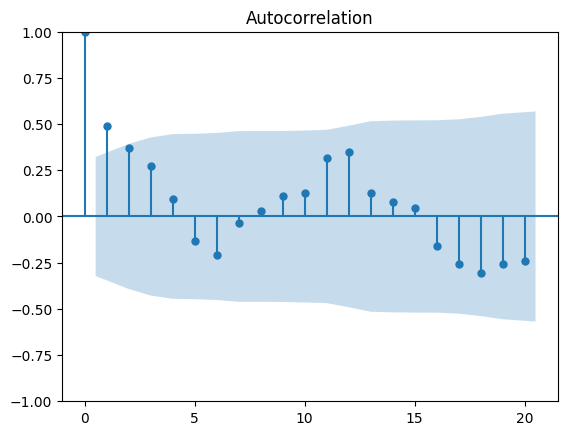

In [12]:
acf_plot = plot_acf(vimana_df.demand, lags = 20)

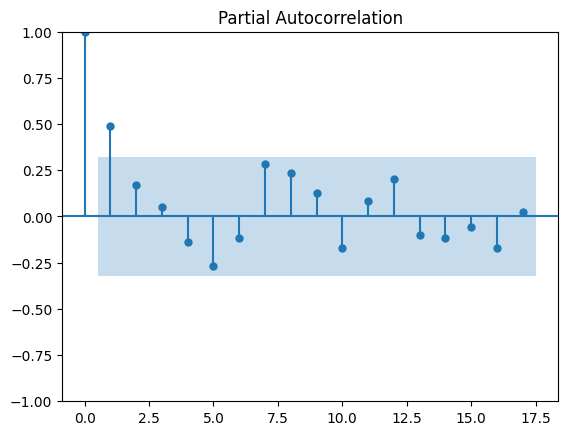

In [16]:
pacf_plot = plot_pacf(vimana_df.demand, lags = 17)

In [26]:
from statsmodels.tsa.arima.model import ARIMA

In [28]:
arima = ARIMA(vimana_df.demand[0:30].astype(np.float64).to_numpy(),order = (1,0,0))
ar_model = arima.fit()

In [34]:
ar_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                   30
Model:                 ARIMA(1, 0, 0)   Log Likelihood                -182.765
Date:                Tue, 07 Oct 2025   AIC                            371.530
Time:                        13:43:21   BIC                            375.734
Sample:                             0   HQIC                           372.875
                                 - 30                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        513.4426     43.815     11.718      0.000     427.567     599.318
ar.L1          0.4726      0.181      2.617      0.009       0.119       0.827
sigma2      1.136e+04   3299.003      3.444      0.001    4896.110    1.78e+04
===================================================================================
Ljung-Box (L1) (Q):                   0.55   Jarque-Bera (JB):                 1.72
Prob(Q):                              0.46   Prob(JB):                         0.42
Heteroskedasticity (H):               2.72   Skew:                             0.59
Prob(H) (two-sided):                  0.13   Kurtosis:                         2.96
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

#### Forcast and Measure Accuracy

In [37]:
forecast_31_37 = ar_model.predict(30,36)

In [39]:
forecast_31_37

array([480.15275044, 497.71045556, 506.00790339, 509.92912432,
       511.78222105, 512.65796042, 513.0718187 ])

In [43]:
def get_mape(actual, predicted):
    actual, predicted = np.array(actual), np.array(predicted)
    return np.mean(np.abs((actual - predicted) / actual)) * 100

get_mape(vimana_df.demand[30:],
         forecast_31_37)

19.120399184438828

In [49]:
arima = ARIMA(vimana_df.demand[0:30].astype(np.float64).to_numpy(), order = (0,0,1))
ma_model = arima.fit()
ma_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                   30
Model:                 ARIMA(0, 0, 1)   Log Likelihood                -184.297
Date:                Tue, 07 Oct 2025   AIC                            374.595
Time:                        13:49:55   BIC                            378.799
Sample:                             0   HQIC                           375.940
                                 - 30                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        517.0213     31.024     16.665      0.000     456.215     577.827
ma.L1          0.3173      0.224      1.414      0.157      -0.122       0.757
sigma2      1.265e+04   4209.484      3.004      0.003    4395.561    2.09e+04
===================================================================================
Ljung-Box (L1) (Q):                   0.41   Jarque-Bera (JB):                 2.21
Prob(Q):                              0.52   Prob(JB):                         0.33
Heteroskedasticity (H):               2.25   Skew:                             0.66
Prob(H) (two-sided):                  0.22   Kurtosis:                         2.90
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [53]:
forecast_31_37 = ma_model.predict(30,36)
get_mape(vimana_df.demand[30:],
         forecast_31_37)

17.775665146550775

In [55]:
# The MAPE of the MA model with lag 1 is 17.8

In [57]:
arima = ARIMA( vimana_df.demand[0:30].astype(np.float64).to_numpy(),
        order = (1,0,1))
arma_model = arima.fit()
arma_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                   30
Model:                 ARIMA(1, 0, 1)   Log Likelihood                -181.846
Date:                Tue, 07 Oct 2025   AIC                            371.692
Time:                        14:00:38   BIC                            377.296
Sample:                             0   HQIC                           373.485
                                 - 30                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        508.3844     59.146      8.595      0.000     392.460     624.308
ar.L1          0.7421      0.316      2.348      0.019       0.123       1.362
ma.L1         -0.3395      0.539     -0.629      0.529      -1.397       0.718
sigma2      1.065e+04   3040.079      3.505      0.000    4696.417    1.66e+04
===================================================================================
Ljung-Box (L1) (Q):                   0.13   Jarque-Bera (JB):                 2.46
Prob(Q):                              0.72   Prob(JB):                         0.29
Heteroskedasticity (H):               3.07   Skew:                             0.67
Prob(H) (two-sided):                  0.09   Kurtosis:                         3.38
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [59]:
forecast_31_37 = arma_model.predict(30, 36)
get_mape( vimana_df.demand[30:],
forecast_31_37 )

20.268907388303866